# CIFAR-10のデータセットを用いたCNNの画像認識

In [9]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [10]:
#CIFAR-10の正規化
from keras.utils import to_categorical
 
# 特徴量の正規化
X_train = X_train/255.
X_test = X_test/255.

In [11]:
# クラスラベルの1-hotベクトル化
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [12]:
# CNNの構築
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
import numpy as np
 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
# コンパイル
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

### エポック数を20

In [14]:
#訓練
history = model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 227s 145ms/step - loss: 2.2267 - accuracy: 0.1524
Epoch 2/20
1563/1563 [==============================] - 225s 144ms/step - loss: 1.9056 - accuracy: 0.3051
Epoch 3/20
1563/1563 [==============================] - 224s 143ms/step - loss: 1.6939 - accuracy: 0.3789
Epoch 4/20
1563/1563 [==============================] - 223s 143ms/step - loss: 1.5281 - accuracy: 0.4428
Epoch 5/20
1563/1563 [==============================] - 221s 142ms/step - loss: 1.4121 - accuracy: 0.4849
Epoch 6/20
1563/1563 [==============================] - 221s 142ms/step - loss: 1.3376 - accuracy: 0.5198
Epoch 7/20
1563/1563 [==============================] - 223s 143ms/step - loss: 1.2881 - accuracy: 0.5406
Epoch 8/20
1563/1563 [==============================] - 224s 143ms/step - loss: 1.2252 - accuracy: 0.5647
Epoch 9/20
1563/1563 [==============================] - 224s 143ms/step - loss: 1.1689 - accuracy: 0.5887
Epoch 10/20
1563/1563 [=======================

In [15]:
# モデルの保存
model.save('./CIFAR-10.h5')

In [16]:
#評価 & 評価結果出力
print(model.evaluate(X_test, Y_test))


313/313 [==============================] - 12s 37ms/step - loss: 0.7487 - accuracy: 0.7421
[0.7487367391586304, 0.7421000003814697]


結果74%

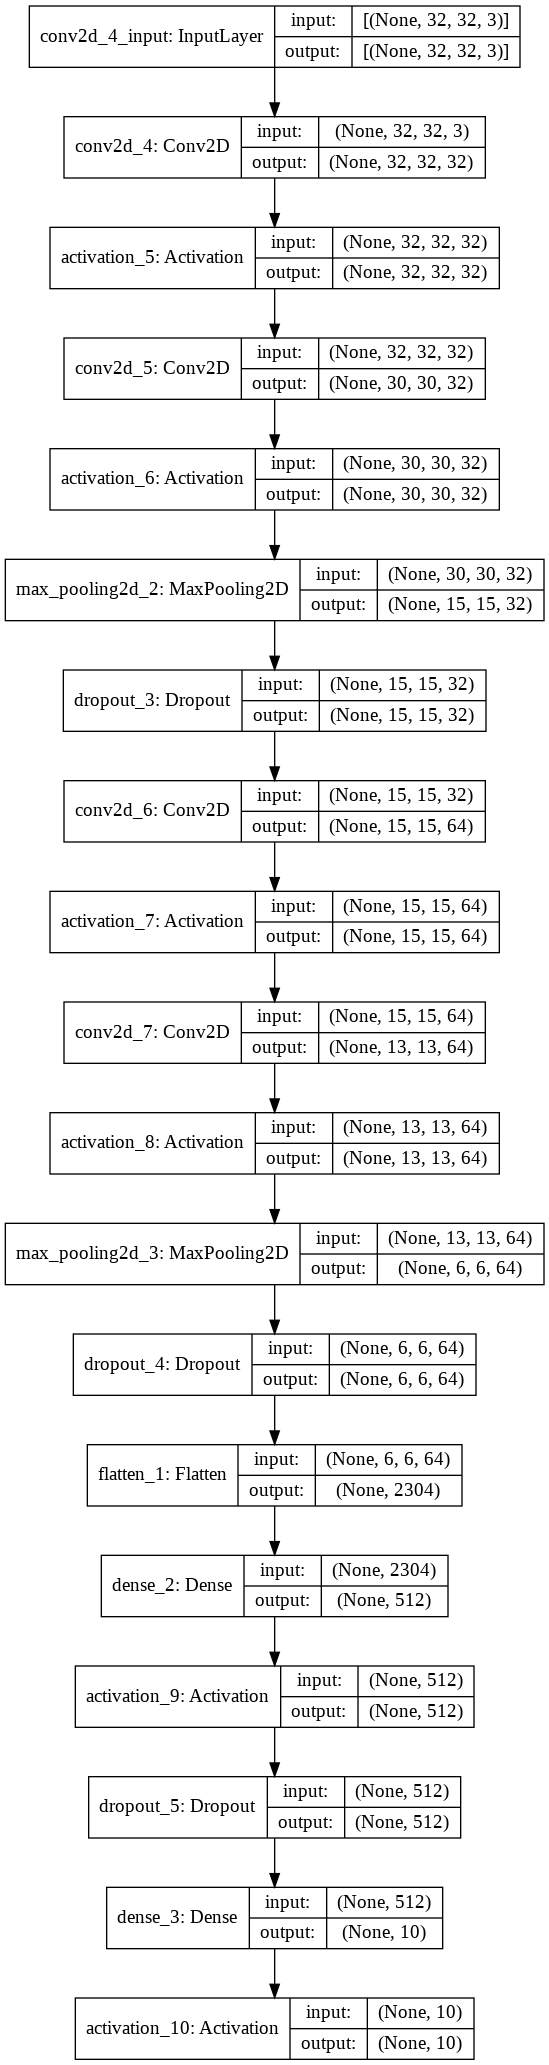

In [17]:
#モデルの図示化
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)


###エポック数を30

In [18]:
history = model.fit(X_train, Y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 230s 147ms/step - loss: 0.7869 - accuracy: 0.7236
Epoch 2/30
1563/1563 [==============================] - 233s 149ms/step - loss: 0.7630 - accuracy: 0.7319
Epoch 3/30
1563/1563 [==============================] - 235s 150ms/step - loss: 0.7480 - accuracy: 0.7380
Epoch 4/30
1563/1563 [==============================] - 229s 146ms/step - loss: 0.7292 - accuracy: 0.7431
Epoch 5/30
1563/1563 [==============================] - 232s 148ms/step - loss: 0.7083 - accuracy: 0.7505
Epoch 6/30
1563/1563 [==============================] - 230s 147ms/step - loss: 0.6977 - accuracy: 0.7532
Epoch 7/30
1563/1563 [==============================] - 233s 149ms/step - loss: 0.6815 - accuracy: 0.7615
Epoch 8/30
1563/1563 [==============================] - 231s 148ms/step - loss: 0.6663 - accuracy: 0.7652
Epoch 9/30
1563/1563 [==============================] - 233s 149ms/step - loss: 0.6526 - accuracy: 0.7691
Epoch 10/30
1563/1563 [=======================

In [19]:
# モデルの保存
model.save('./CIFAR-10.h5')

In [20]:
#評価 & 評価結果出力
print(model.evaluate(X_test, Y_test))

313/313 [==============================] - 11s 35ms/step - loss: 0.5841 - accuracy: 0.8049
[0.5841355323791504, 0.8048999905586243]


結果80%

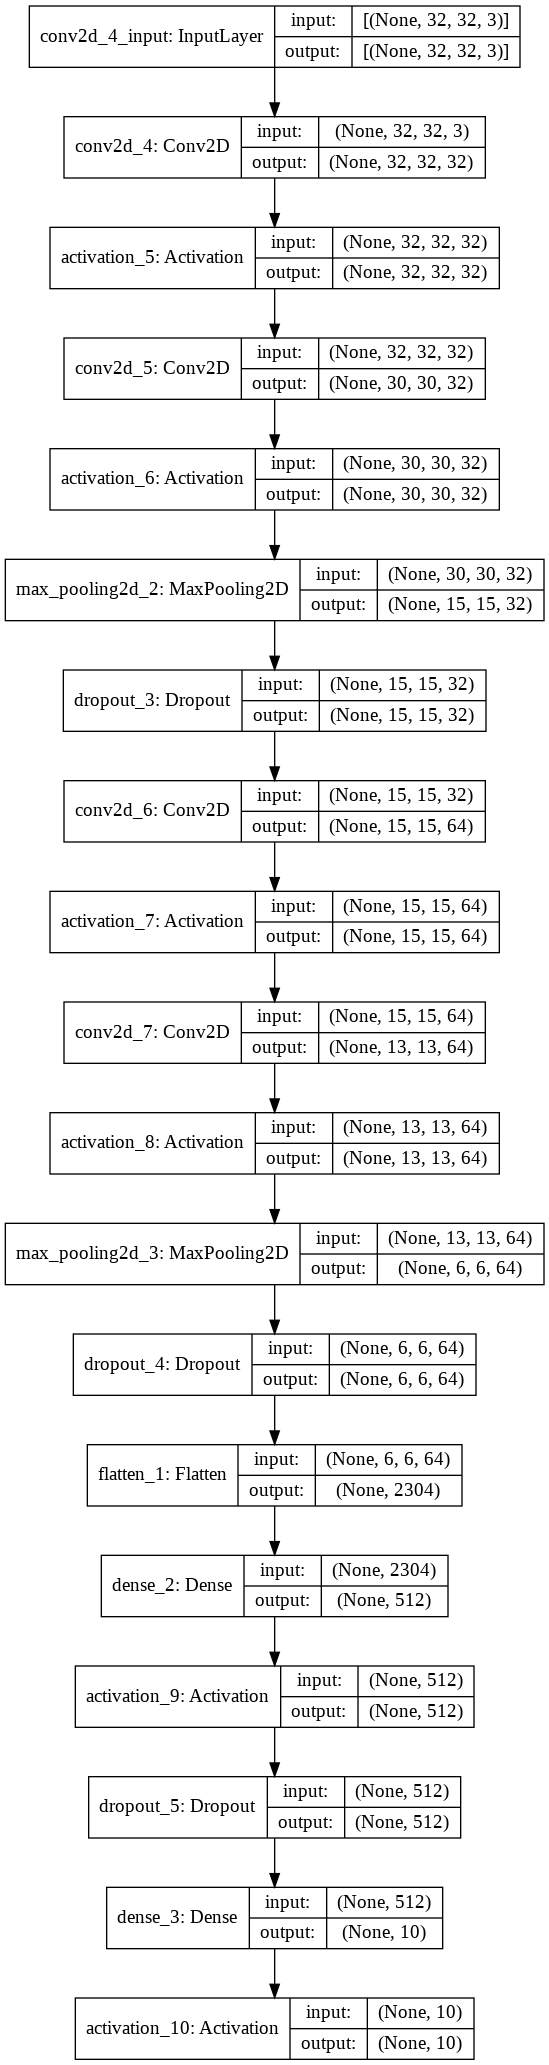

In [21]:
#モデルの図示化
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)